In [2]:
import sys

import numpy as np
import pandas as pd
import torch

sys.path.append('..')

'''
    sys.path.append('..') 的作用是将上一级目录（父目录）添加到 Python 解释器的搜索路径中。这样做的原因是为了确保在运行时能够正确地找到你的模块或类定义。
    当你使用 pickle.load 加载对象时，Python 解释器需要找到与该对象关联的类定义。如果你的类定义在上一级目录中，而当前工作目录或默认的模块搜索路径中找不到该定义，就会导致 ModuleNotFoundError。

    通过将上一级目录添加到 sys.path，你扩展了 Python 解释器的搜索路径，使其包括了上一级目录。这样，当你执行 pickle.load 时，Python 解释器就能够找到并加载与对象相关的类定义，从而成功地反序列化对象。
'''

import pickle


with open('./obj/train_data.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    train_data = pickle.load(exp_f)
with open('./obj/testdata.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    testdata = pickle.load(exp_f)
with open('./obj/predata.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    predata = pickle.load(exp_f)

In [46]:
import numpy as np

seq_x, seq_y, seq_x_mark, seq_y_mark = train_data.__getitem__(100)
seq_x.shape, seq_y.shape, seq_x_mark.shape, seq_y_mark.shape
train_data.__len__()

7897

In [49]:
train_data.data_x

array([[-0.36312285, -0.0057598 , -0.63071223, ...,  1.38857471,
         0.87514257,  1.46055158],
       [-0.38617567,  0.02629596, -0.65010053, ...,  1.32897674,
         0.92433047,  1.16152666],
       [-0.47838673, -0.13398305, -0.68869591, ...,  0.97236495,
         0.68156452,  1.16152666],
       ...,
       [ 0.07470776, -0.71050923,  0.07107161, ...,  0.49655723,
        -2.31413576,  0.42562442],
       [ 0.17844536, -0.61434181,  0.21276925, ...,  0.31776309,
        -2.16974552,  0.47161139],
       [ 0.35134102, -0.45406273,  0.27727609, ..., -0.00953795,
        -2.26653455,  0.39489377]])

In [50]:
seq_x, seq_y, seq_x_mark, seq_y_mark = predata.__getitem__(0)
print(f'seq_x.shape = {seq_x.shape}\n'
      f'seq_y.shape = {seq_y.shape}\n'
      f'seq_x_mark.shape = {seq_x_mark.shape}\n'
      f'seq_y_mark.shape = {seq_y_mark.shape}\n\n'
      f'predata.seq_len = {predata.seq_len}\n'
      f'predata.label_len = {predata.label_len}\n'
      f'predata.pred_len = {predata.pred_len}')

seq_x.shape = (720, 7)
seq_y.shape = (168, 7)
seq_x_mark.shape = (720, 4)
seq_y_mark.shape = (192, 4)

predata.seq_len = 720
predata.label_len = 168
predata.pred_len = 24


In [51]:
predata.data_x.shape, predata.data_y.shape

((720, 7), (720, 7))

In [11]:
train_data.data_x.shape, train_data.data_y.shape

((1424, 7), (1424, 7))

In [13]:
testdata.data_x.shape, testdata.data_y.shape

In [52]:
predata

## 自定义数据集

In [5]:
import pickle


with open('./obj01/train_data.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    train_data = pickle.load(exp_f)
with open('./obj01/testdata.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    testdata = pickle.load(exp_f)
with open('./obj01/predata.txt', 'rb') as exp_f:
    # 使用pickle.load反序列化对象
    predata = pickle.load(exp_f)

In [6]:
train_data.__len__(), testdata.__len__(), predata.__len__()

(1285, 396, 1)

In [18]:
np.array(predata.__getitem__(0)[0])

array([[-0.91801424, -0.91279237, -0.90137248, -0.91694797, -0.79308079,
        -0.69723595, -0.91376193],
       [-0.90259881, -0.91279237, -0.89928568, -0.92515805, -0.93306024,
        -0.76491736, -0.9178687 ],
       [-0.91287576, -0.88546497, -0.93163113, -0.91900049,  0.09257061,
        -0.26748919, -0.91478862],
       [-0.91698654, -0.85611332, -0.92850093, -0.92618431, -0.20151372,
        -0.40647374, -0.92505555],
       [-0.94370662, -0.96137441, -0.93058773, -0.93849943, -0.92093743,
        -0.76071791, -0.94866948],
       [-0.96631592, -0.96744717, -0.96606339, -0.93336813, -0.90719263,
        -0.7550632 , -0.93840255],
       [-0.92829119, -0.93303489, -0.96501999, -0.97236602, -0.64868153,
        -0.63260948, -0.97639017],
       [-0.84299248, -0.87635583, -0.9118065 , -0.93542065, -0.63625555,
        -0.62051883, -0.92813562],
       [-0.7731092 , -0.789313  , -0.83876838, -0.85639863, -0.47428701,
        -0.53098889, -0.84497353],
       [-0.75666607, -0.7812

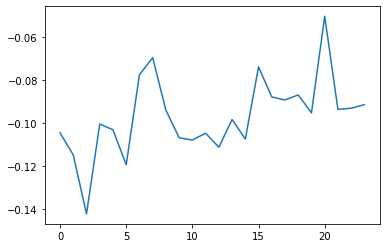

In [36]:
import os
import matplotlib.pyplot  as plt
os.getcwd()
prediction = np.load('../results/test/real_prediction.npy')
plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

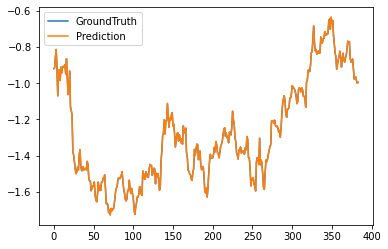

In [40]:
preds = np.load('../results/test/true.npy')
trues = np.load('../results/test/pred.npy')

plt.figure()
plt.plot(trues[:, 0,-1], label='GroundTruth')
plt.plot(preds[:, 0,-1], label='Prediction')
plt.legend()
plt.show()

In [1]:
import os
print(os.getcwd())

import numpy as np
path_name = 'informer_Seismic-ACC_ftS_sl96_ll64_pl8_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_\'Exp\'_0'
true_arr = np.load(f'../results/{path_name}/true.npy')
pre_arr = np.load(f'../results/{path_name}/pred.npy')
# rp_arr = np.load(f'../results/{path_name}/real_prediction.npy')

u:\CODE\Informer2020\my_tool


In [2]:
pre_arr.shape, true_arr.shape
with open('result_0117.txt', 'w') as f:
    for t, p in zip(true_arr[:, 0,-1], pre_arr[:, 0,-1]):
        f.write(str(t)+"\t"+str(p)+"\n")


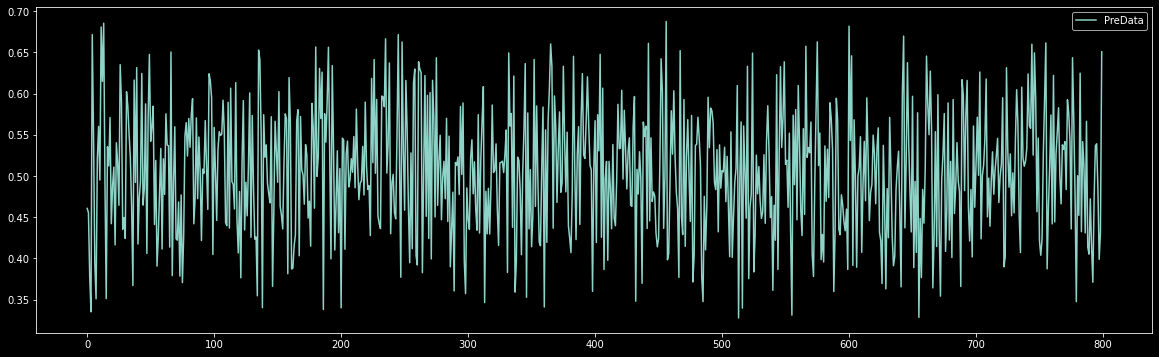

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# plt.plot(true_arr[600:, 0,-1], label='GroundTruth')
# plt.plot(pre_arr[600:, 0,-1], label='PreData')
plt.plot(rp_arr[:, 0,-1], label='PreData')
plt.legend()
plt.show()
print()